<a href="https://colab.research.google.com/github/tirthasheshpatel/semester6_practicals/blob/main/Practical-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 5

In [53]:
import tensorflow
from tensorflow import keras
import cv2
import numpy as np
from keras.applications.xception import Xception, preprocess_input
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten, GlobalAveragePooling2D, Input
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [54]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print("X_train -> ",X_train.shape)
print("y_train -> ",y_train.shape)
print("X_test  -> ",X_test.shape)
print("y_test  -> ",y_test.shape)

X_train ->  (50000, 32, 32, 3)
y_train ->  (50000, 1)
X_test  ->  (10000, 32, 32, 3)
y_test  ->  (10000, 1)


In [55]:
X_train  =X_train[:20000]
y_train  =y_train[:20000]
X_test   =X_test[:10000]
y_test   =y_test[:10000]
print("X_train -> ",X_train.shape)
print("y_train -> ",y_train.shape)
print("X_test  -> ",X_test.shape)
print("y_test  -> ",y_test.shape)

X_train ->  (20000, 32, 32, 3)
y_train ->  (20000, 1)
X_test  ->  (10000, 32, 32, 3)
y_test  ->  (10000, 1)


In [56]:
X_train = X_train.reshape(20000, 32*32, 3)
X_test = X_test.reshape(10000, 32*32, 3)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

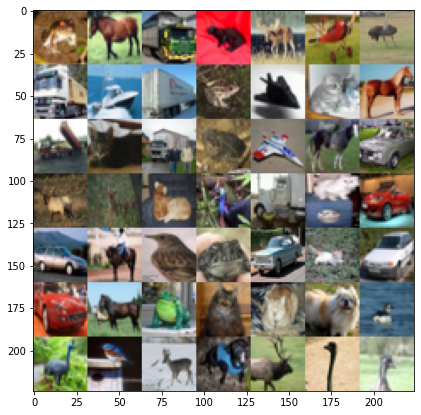

In [57]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, :, :]
X_to_plot = np.concatenate([
                    X_to_plot[  : 7, ...].reshape(32*7, 32, 3),
                    X_to_plot[ 7:14, ...].reshape(32*7, 32, 3),
                    X_to_plot[14:21, ...].reshape(32*7, 32, 3),
                    X_to_plot[21:28, ...].reshape(32*7, 32, 3),
                    X_to_plot[28:35, ...].reshape(32*7, 32, 3),
                    X_to_plot[35:42, ...].reshape(32*7, 32, 3),
                    X_to_plot[42:49, ...].reshape(32*7, 32, 3)
                ], axis=1
            )
ax.imshow(X_to_plot)

In [58]:
X_train, X_test = X_train.reshape(20000, 32, 32, 3), X_test.reshape(10000, 32, 32, 3)

In [59]:
X_train_ = np.array([cv2.resize(X_train[i], dsize=(72,72)) for i in range(len(X_train))]).astype('float64')
X_test_ = np.array([cv2.resize(X_test[i], dsize=(72,72)) for i in range(len(X_test))]).astype('float64')
X_train_ = preprocess_input(X_train_)
X_test_ = preprocess_input(X_test_)
print(X_train_.shape)
print(X_test_.shape)

(20000, 72, 72, 3)
(10000, 72, 72, 3)


In [60]:
model_pretrained = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(72,72,3), pooling=None)

In [61]:
model_pretrained.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [62]:
X_train_ = model_pretrained.predict(X_train_)
X_test_ = model_pretrained.predict(X_test_)

In [63]:
X_train_.shape

(20000, 3, 3, 2048)

## Classifier on top

In [64]:
model = Sequential()
model.add(Input(shape=[3, 3, 2048]))
model.add(GlobalAveragePooling2D())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 400)               819600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                4010      
Total params: 823,610
Trainable params: 823,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(X_train_, y_train, validation_data=(X_test_, y_test), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 1.1678 - accuracy: 0.6150 - val_loss: 0.8456 - val_accuracy: 0.7159
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.7462 - accuracy: 0.7438 - val_loss: 0.7941 - val_accuracy: 0.7295
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.6321 - accuracy: 0.7764 - val_loss: 0.8185 - val_accuracy: 0.7276
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.8114 - val_loss: 0.8175 - val_accuracy: 0.7280
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4542 - accuracy: 0.8365 - val_loss: 0.8493 - val_accuracy: 0.7350
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3706 - accuracy: 0.8665 - val_loss: 0.8558 - val_accuracy: 0.7318
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3121 - accuracy: 0.8914 - val_loss: 0.9032 - val_accuracy: 0.7354
Epoch 

In [67]:
scores = model.evaluate(x=X_test_, y=y_test, verbose=1)
print(model.metrics_names)
print("Test Loss :", scores[0])
print("Baseline Error:", round((100-scores[1]*100),2),'%')

313/313 [==============================] - 1s 3ms/step - loss: 1.5048 - accuracy: 0.7276
['loss', 'accuracy']
Test Loss : 1.5048022270202637
Baseline Error: 27.24 %


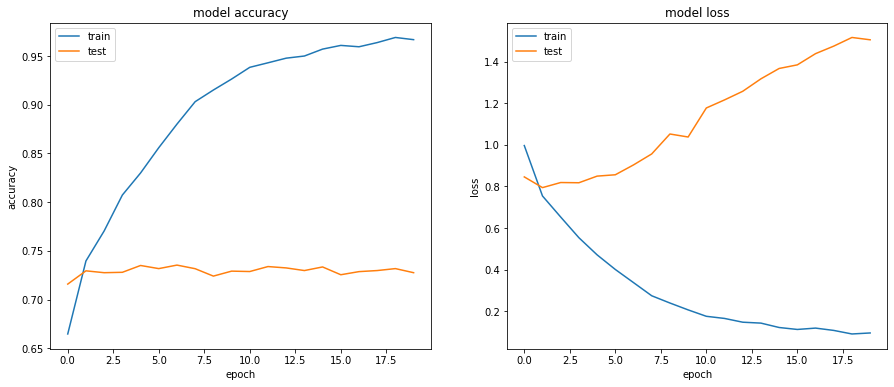

In [68]:
# summarize history for accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(history.history['accuracy']);
ax[0].plot(history.history['val_accuracy']);
ax[0].set_title('model accuracy');
ax[0].set_ylabel('accuracy');
ax[0].set_xlabel('epoch');
ax[0].legend(['train', 'test'], loc='upper left');
# summarize history for loss
ax[1].plot(history.history['loss']);
ax[1].plot(history.history['val_loss']);
ax[1].set_title('model loss');
ax[1].set_ylabel('loss');
ax[1].set_xlabel('epoch');
ax[1].legend(['train', 'test'], loc='upper left');

In [69]:
from sklearn.metrics import roc_curve, auc

In [70]:
y_preds = model.predict(X_test_)

In [71]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

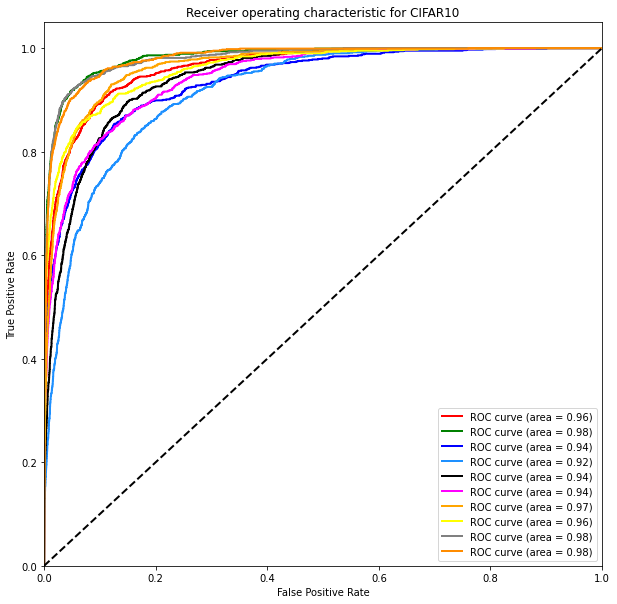

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
lw = 2

colors = [
    "red", "green", "blue", "dodgerblue", "black",
    "magenta", "orange", "yellow", "gray", "darkorange"
]

for i in range(10):
    ax.plot(fpr[i], tpr[i], color=colors[i],
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i]);
ax.plot([0, 1], [0, 1], color="black", lw=lw, linestyle='--');
ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.set_xlabel('False Positive Rate');
ax.set_ylabel('True Positive Rate');
ax.set_title('Receiver operating characteristic for CIFAR10');
ax.legend();